In [20]:
import numpy as np
import pandas as pd
from math import sqrt
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import NearestNeighbors
from scipy.stats import pearsonr

In [21]:
movies=pd.read_csv("movies.csv")
ratings=pd.read_csv("ratings.csv")
movies.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [22]:
m = movies.movieId.value_counts()
m

1         1
53322     1
53129     1
53138     1
53140     1
         ..
4390      1
4392      1
4393      1
4394      1
193609    1
Name: movieId, Length: 9742, dtype: int64

In [23]:
m.shape

(9742,)

In [24]:
new_df=pd.merge(ratings,movies,on='movieId').drop(['timestamp','genres'],axis=1)

In [25]:
new_df.shape

(100836, 4)

In [26]:
new_df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [27]:
v = ratings.userId.value_counts()
v_df=ratings[ratings.userId.isin(v.index[v.gt(10)])]
v

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: userId, Length: 610, dtype: int64

Text(0, 0.5, 'voted')

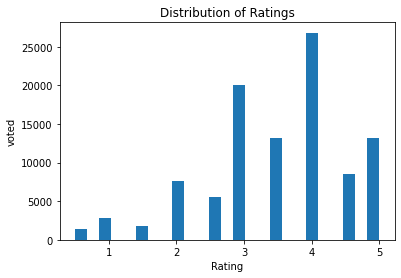

In [28]:
ratings.rating.plot.hist(bins=25)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("voted")

In [29]:
avgratings=pd.DataFrame(new_df.groupby('title')['rating'].mean())
avgratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [30]:
avgratings['number_of_ratings']=new_df.groupby('title')['rating'].count()
avgratings.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


Text(0, 0.5, 'movies')

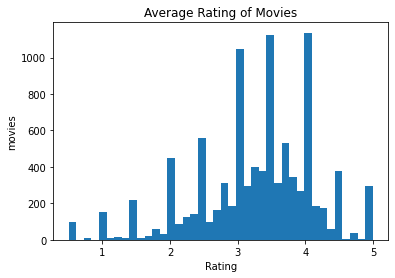

In [31]:
avgratings.rating.plot.hist(bins=40)
plt.title("Average Rating of Movies")
plt.xlabel("Rating")
plt.ylabel("movies")

In [32]:
normalizedratings = pd.DataFrame(avgratings['rating'])
avgratings['ratingNormalized'] = normalizedratings.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
avgratings


,rating,number_of_ratings,ratingNormalized
title,,,
'71 (2014),4.000000,1,0.777778
'Hellboy': The Seeds of Creation (2004),4.000000,1,0.777778
'Round Midnight (1986),3.500000,2,0.666667
'Salem's Lot (2004),5.000000,1,1.000000
'Til There Was You (1997),4.000000,2,0.777778
...,...,...,...
eXistenZ (1999),3.863636,22,0.747475
xXx (2002),2.770833,24,0.504630
xXx: State of the Union (2005),2.000000,5,0.333333


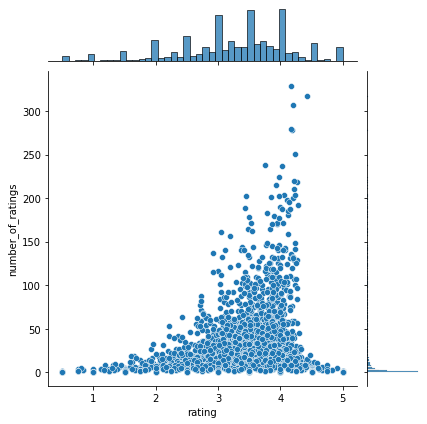

In [49]:
sb.jointplot(x='rating', y='number_of_ratings', data=avgratings)

In [ ]:
avgratings.sort_values('number_of_ratings',ascending=False).head(30)

In [34]:
movie_matrix=new_df.pivot_table(index='userId',columns='title',values='rating').fillna(0)

In [35]:
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
movie_user_rating=movie_matrix['Platoon (1986)']

In [37]:
movie_user_rating

userId
1      4.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
606    4.0
607    0.0
608    0.0
609    0.0
610    4.0
Name: Platoon (1986), Length: 610, dtype: float64

In [38]:
similar_movies=movie_matrix.corrwith(movie_user_rating)

In [39]:
similar_movies.head()

title
'71 (2014)                                 0.116448
'Hellboy': The Seeds of Creation (2004)   -0.013352
'Round Midnight (1986)                    -0.018899
'Salem's Lot (2004)                       -0.013352
'Til There Was You (1997)                 -0.018333
dtype: float64

In [40]:
corr_movie=pd.DataFrame(similar_movies,columns=['correlation'])

In [41]:
corr_movie.dropna(inplace=True)

In [42]:
corr_movie.sort_values(by='correlation',ascending=False).head(4)

,correlation
title,
Platoon (1986),1.000000
Apocalypse Now (1979),0.491685
Full Metal Jacket (1987),0.485977
Unforgiven (1992),0.456386


In [43]:
def rec(movie,user_rat):
    df=pd.DataFrame()
    movie_user_rating=movie_matrix[movie]
    similar_movies=movie_matrix.corrwith(movie_user_rating)
    corr_movie=pd.DataFrame(similar_movies,columns=['correlation'])
    corr_movie.dropna(inplace=True)
    df=df.append(corr_movie.sort_values(by='correlation',ascending=False)[1:4])
    df["combined"]=df["correlation"]*user_rat
    return df

In [44]:
recommend_df=pd.DataFrame()
recommend_df=recommend_df.append(rec('Platoon (1986)',4.5))

In [45]:
recommend_df=recommend_df.append(rec('Last Samurai, The (2003)',4))

In [46]:
recommend_df=recommend_df.append(rec('Sound of Music, The (1965)',4))

In [47]:
recommend_df

,correlation,combined
title,,
Apocalypse Now (1979),0.491685,2.212583
Full Metal Jacket (1987),0.485977,2.186896
Unforgiven (1992),0.456386,2.053736
War of the Worlds (2005),0.531988,2.127950
Star Wars: Episode III - Revenge of the Sith (2005),0.522071,2.088285
X-Men: The Last Stand (2006),0.515773,2.063091
Mary Poppins (1964),0.710828,2.843311
Grease (1978),0.462772,1.851088
West Side Story (1961),0.451613,1.806450


In [48]:
recommend_df.sort_values(by='combined',ascending=False).head(5)

,correlation,combined
title,,
Mary Poppins (1964),0.710828,2.843311
Apocalypse Now (1979),0.491685,2.212583
Full Metal Jacket (1987),0.485977,2.186896
War of the Worlds (2005),0.531988,2.127950
Star Wars: Episode III - Revenge of the Sith (2005),0.522071,2.088285
